### Problem Statement

#### Zomato is one of the best online food delivery apps which gives the users the ratings and the reviews on restaurants all over india.These ratings and the Reviews are considered as one of the most important deciding factors which determine how good a restaurant is.

#### We will therefore use the real time Data set with variuos features a user would look into regarding a restaurant. We will be considering Banglore City in this analysis.


#### The main agenda of this project is:

#### Perform extensive Exploratory Data Analysis(EDA) on the Zomato Dataset.

#### Build an appropriate Machine Learning Model that will help various Zomato Restaurants to predict their respective Ratings based on certain features

#### DEPLOY the Machine learning model via Flask that can be used to make live predictions of restaurants ratings

### Feature Engineering Steps

* Handle missing values
* Encode categorical data into numerical data -> nominal data and ordinal data ... worst<average<excellent
              ordinal -> label encoding, factorize()
              nominal -> pd.get_dummies(), sklearn(onehotencoding), count encoding
* Feature importance -> heatmap, extratreeregressor
* Splitting -> train & test dataset
* Apply models
* Serialization/saving our model into pickle file
* Deployment using Flask framework ---> other servers like(heroku,aws,azure,google cloud) --> -->

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
data = pd.read_csv('zomato.csv')

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Columns description:

1.url </B> contains the url of the restaurant in the zomato website

2.address contains the address of the restaurant in Bengaluru

3.name contains the name of the restaurant

4.online_order whether online ordering is available in the restaurant or not

5.book_table table book option available or not

6.rate contains the overall rating of the restaurant out of 5

7.votes contains total number of rating for the restaurant as of the above mentioned date

8.phone contains the phone number of the restaurant

9.location contains the neighborhood in which the restaurant is located

10.rest_type restaurant type

11.dish_liked dishes people liked in the restaurant

12.cuisines food styles, separated by comma

13.approx_cost(for two people) contains the approximate cost of meal for two people

14.reviews_list list of tuples containing reviews for the restaurant, each tuple

15.menu_item contains list of menus available in the restaurant

16.listed_in(type) type of meal

17.listed_in(city) contains the neighborhood in which the restaurant is listed

### Target Variable/Dependent Variable : rate 

In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
data.shape

(51717, 17)

In [6]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

### Value_Counts

In [7]:
data.name.value_counts()[:5]

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Name: name, dtype: int64

In [8]:
data.book_table.value_counts()

No     45268
Yes     6449
Name: book_table, dtype: int64

In [9]:
data.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [10]:
#data.approx_cost(for two people).value_counts()

In [11]:
data = data.rename(columns={'approx_cost(for two people)':'cost', 'listed_in(type)':'type', 'listed_in(city)':'city'})

In [12]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [13]:
data.cost.value_counts()[:5]

300    7576
400    6562
500    4980
200    4857
600    3714
Name: cost, dtype: int64

In [14]:
data.type.value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: type, dtype: int64

### Feature Engineering

### Missing Values

In [15]:
data.isnull().sum()

url                 0
address             0
name                0
online_order        0
book_table          0
rate             7775
votes               0
phone            1208
location           21
rest_type         227
dish_liked      28078
cuisines           45
cost              346
reviews_list        0
menu_item           0
type                0
city                0
dtype: int64

<AxesSubplot:>

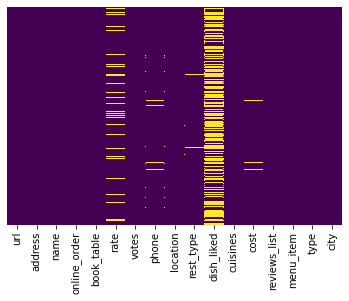

In [16]:
sns.heatmap(data.isnull(), cmap='viridis', yticklabels=False, cbar=False)

In [17]:
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


fillna()
sklearn -> SimpleImputer

In [18]:
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [20]:
data.shape

(23193, 17)

### Dropping Unwanted columns

In [21]:
df = data.drop(['url','address','phone'],axis=1)

In [22]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [23]:
df.duplicated().sum()

11

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

#### Cleaning Data

In [26]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [27]:
df['cost'] = df['cost'].apply(lambda x : x.replace(',',''))
df['cost'] = df['cost'].astype(float)

In [28]:
df['cost'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        750.,  200.,  850., 1200.,  150.,  350.,  250., 1500., 1300.,
       1000.,  100.,  900., 1100., 1600.,  950.,  230., 1700., 1400.,
       1350., 2200., 2000., 1800., 1900.,  180.,  330., 2500., 2100.,
       3000., 2800., 3400.,   40., 1250., 3500., 4000., 2400., 1450.,
       3200., 6000., 1050., 4100., 2300.,  120., 2600., 5000., 3700.,
       1650., 2700., 4500.])

In [29]:
df.dtypes

name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [30]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [31]:
df = df.loc[df.rate != 'NEW']

In [32]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [33]:
df['rate'] = df['rate'].apply(lambda x : x.replace('/5', ''))

In [34]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '4.6', '4.0', '4.2', '3.9', '3.0', '3.6',
       '2.8', '4.4', '3.1', '4.3', '2.6', '3.3', '3.5', '3.8 ', '3.2',
       '4.5', '2.5', '2.9', '3.4', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ', '2.9 ', '2.7 ', '2.5 ',
       '2.6 ', '4.5 ', '4.3 ', '3.7 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '3.4 ', '3.6 ', '3.3 ', '4.6 ', '4.9 ', '3.2 ', '3.0 ', '2.8 ',
       '3.5 ', '3.1 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ', '2.2 ',
       '2.0 ', '1.8 '], dtype=object)

In [35]:
df['rate'] = df['rate'].astype(float)

### EDA - Exploratory Data Analysis

1.Which restaurant has highest outlets in Bangaluru?

2.How many of the restuarants do not accept online orders?

3.Whether the restaurants offer table booking ?

4.Whether the restaurants deliver online or not?

5.Rating distribution

6.Distributions of cost for two people

7.Which are the most common restaurant type in Banglore?

8.Cost factor ?

9.Which are the most common cuisines in each locations?

10.No. of restaurants in a particular location

11.Distribution of the cost Vs ratings in parallel with online order

12.Plotting the counts with the help of pie chart

13.Different type of Services restaurant offer

In [36]:
#setting style for the plots and also background
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

### Which restaurant has highest outlets in Bangaluru?

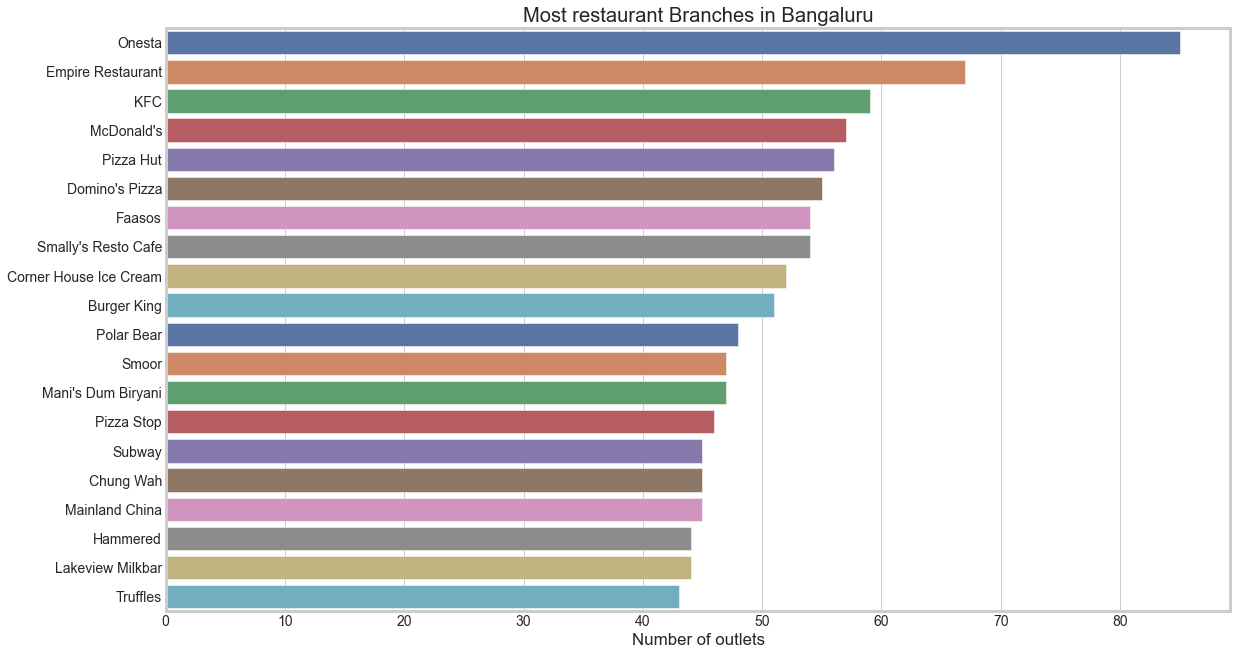

In [37]:
plt.figure(figsize=(17,10))
outlets=df['name'].value_counts()[:20]
sns.barplot(x=outlets,y=outlets.index,palette='deep')
plt.title("Most restaurant Branches in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

#### Observation : As you can see Onesta,Empire Restaurant,KFC has the most number of outlets in and around bangalore

### How many of the restuarants do not accept online orders?

In [38]:
df.online_order.value_counts()

Yes    16288
No      6747
Name: online_order, dtype: int64

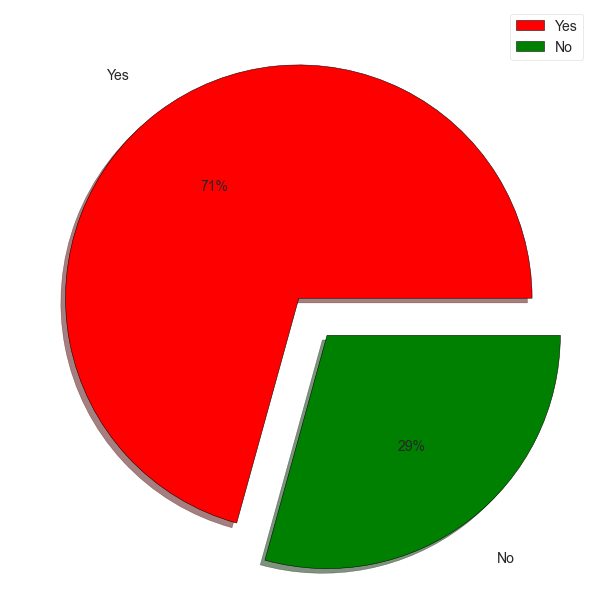

In [39]:
x=df['online_order'].value_counts()
colors = ['red', 'green']

plt.figure(figsize=(10,10))

plt.pie(x, labels=x.index, colors = colors,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%',
        explode = [0,0.2],
        labeldistance=1.2, 
        shadow=True)

plt.legend()
plt.show()

#### 1.As clearly indicated,almost 70 per cent of restaurants in Banglore accepts online orders.

2.Nearly 30 per cent of the restaurants do not accept online orders.

3.This might be because of the fact that these restaurants cannot afford to pay commission to zomoto for giving them orders online.

### Whether restaurant offer Table booking or not

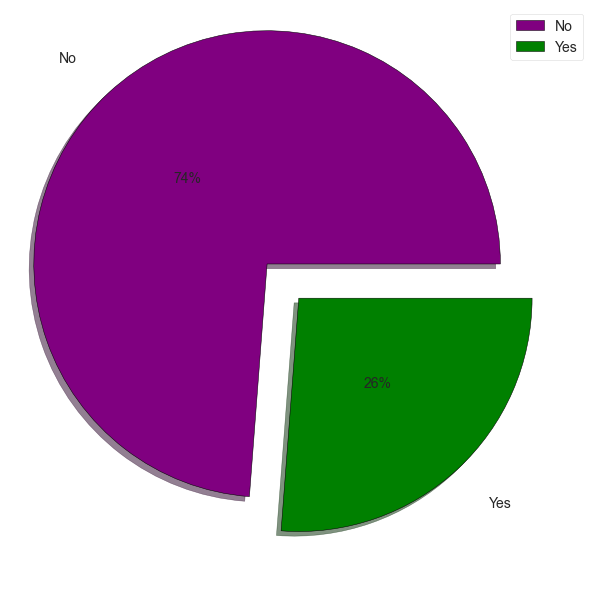

In [40]:
x=df['book_table'].value_counts()
colors = ['purple', 'green']

plt.figure(figsize=(10,10))

plt.pie(x, labels=x.index,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%', 
        explode = [0.2,0], colors=colors,
        pctdistance=.5, labeldistance=1.2,shadow=True)

plt.legend()
plt.show()

#### Almost 74 percent of restaurants in Banglore do not provide table booking facility.

and it makes sense right, In India you cannot find table booking facility in any average restaurants,usually only five star restaurants provides table booking.

### Whether Restaurants deliver online or Not

C:\Users\XSKodaliYa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


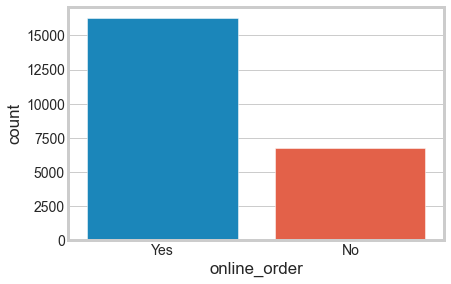

In [41]:
#Restaurants delivering Online or not
sns.countplot(df['online_order'])
plt.show()

#### Insight:

Most Restaurants offer option for online order and delivery

### Rating Distributions

C:\Users\XSKodaliYa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


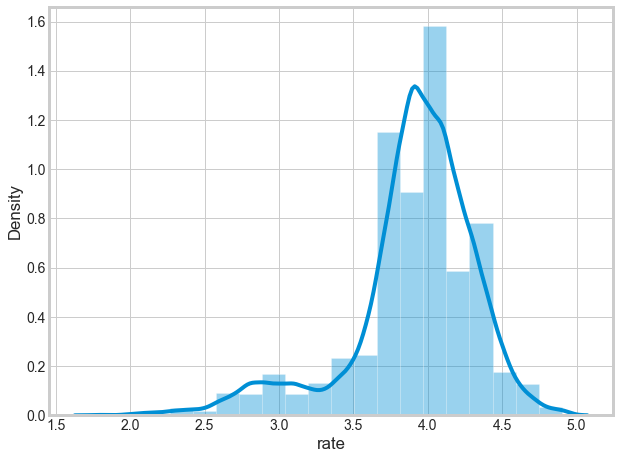

In [42]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)
plt.show()

#### Observations:
We can see that the distribution is left skewed.
This means the average rating of restaurants is distributed in b/w 3.8 to 4.5

### Distributions of cost for two people

C:\Users\XSKodaliYa\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


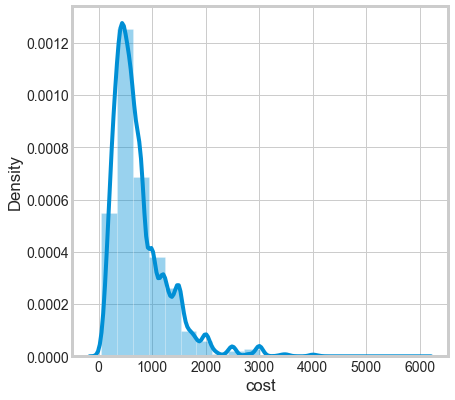

In [43]:
plt.figure(figsize=(6,6))
sns.distplot(df['cost'], bins=20)
plt.show()

#### Observations:
We can see that the distribution is right skewed.
This means almost 90percent of restaurants serve food for budget less than 1000 INR.($15)

### Most Common Restaurant Types

C:\Users\XSKodaliYa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


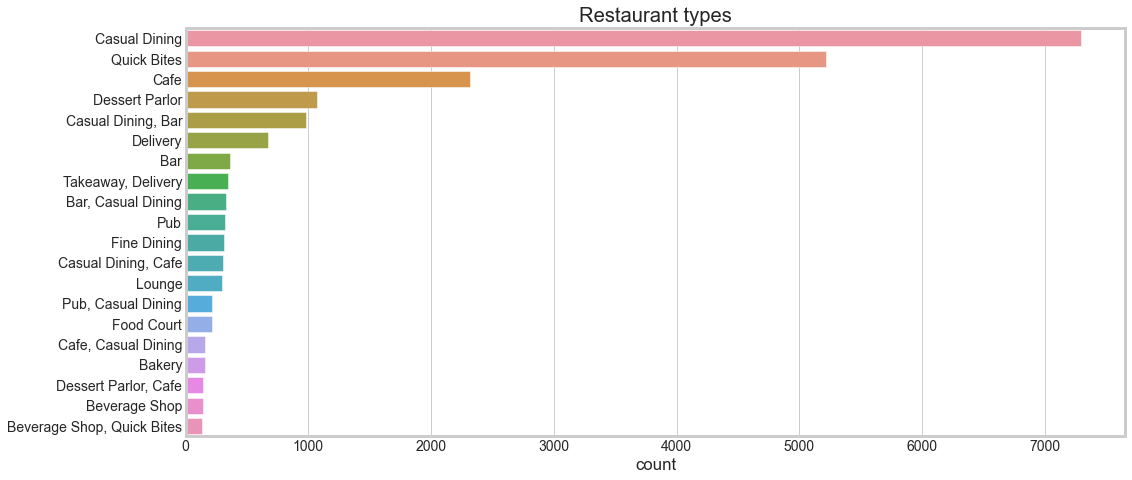

In [44]:
plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")
plt.show()

#### Casual Dining, Quick Bites and Cafe are the 3 most common types of Restaurants in Banglore

### Cost Factor

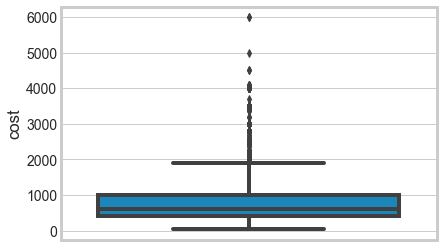

In [45]:
sns.boxplot(y='cost',data=df)
plt.show()

#### Observations:
    The median approximate cost for two people is 400 for a single meal.
    50 percent of restaurants charge between 300 and 650 for single meal for two people.

### No. of restaurants in a particular location

In [46]:
df.location.value_counts()

Koramangala 5th Block    1760
BTM                      1444
Indiranagar              1334
HSR                      1155
Jayanagar                1030
                         ... 
Kanakapura Road             2
Yelahanka                   2
Magadi Road                 2
Rajarajeshwari Nagar        2
KR Puram                    1
Name: location, Length: 88, dtype: int64

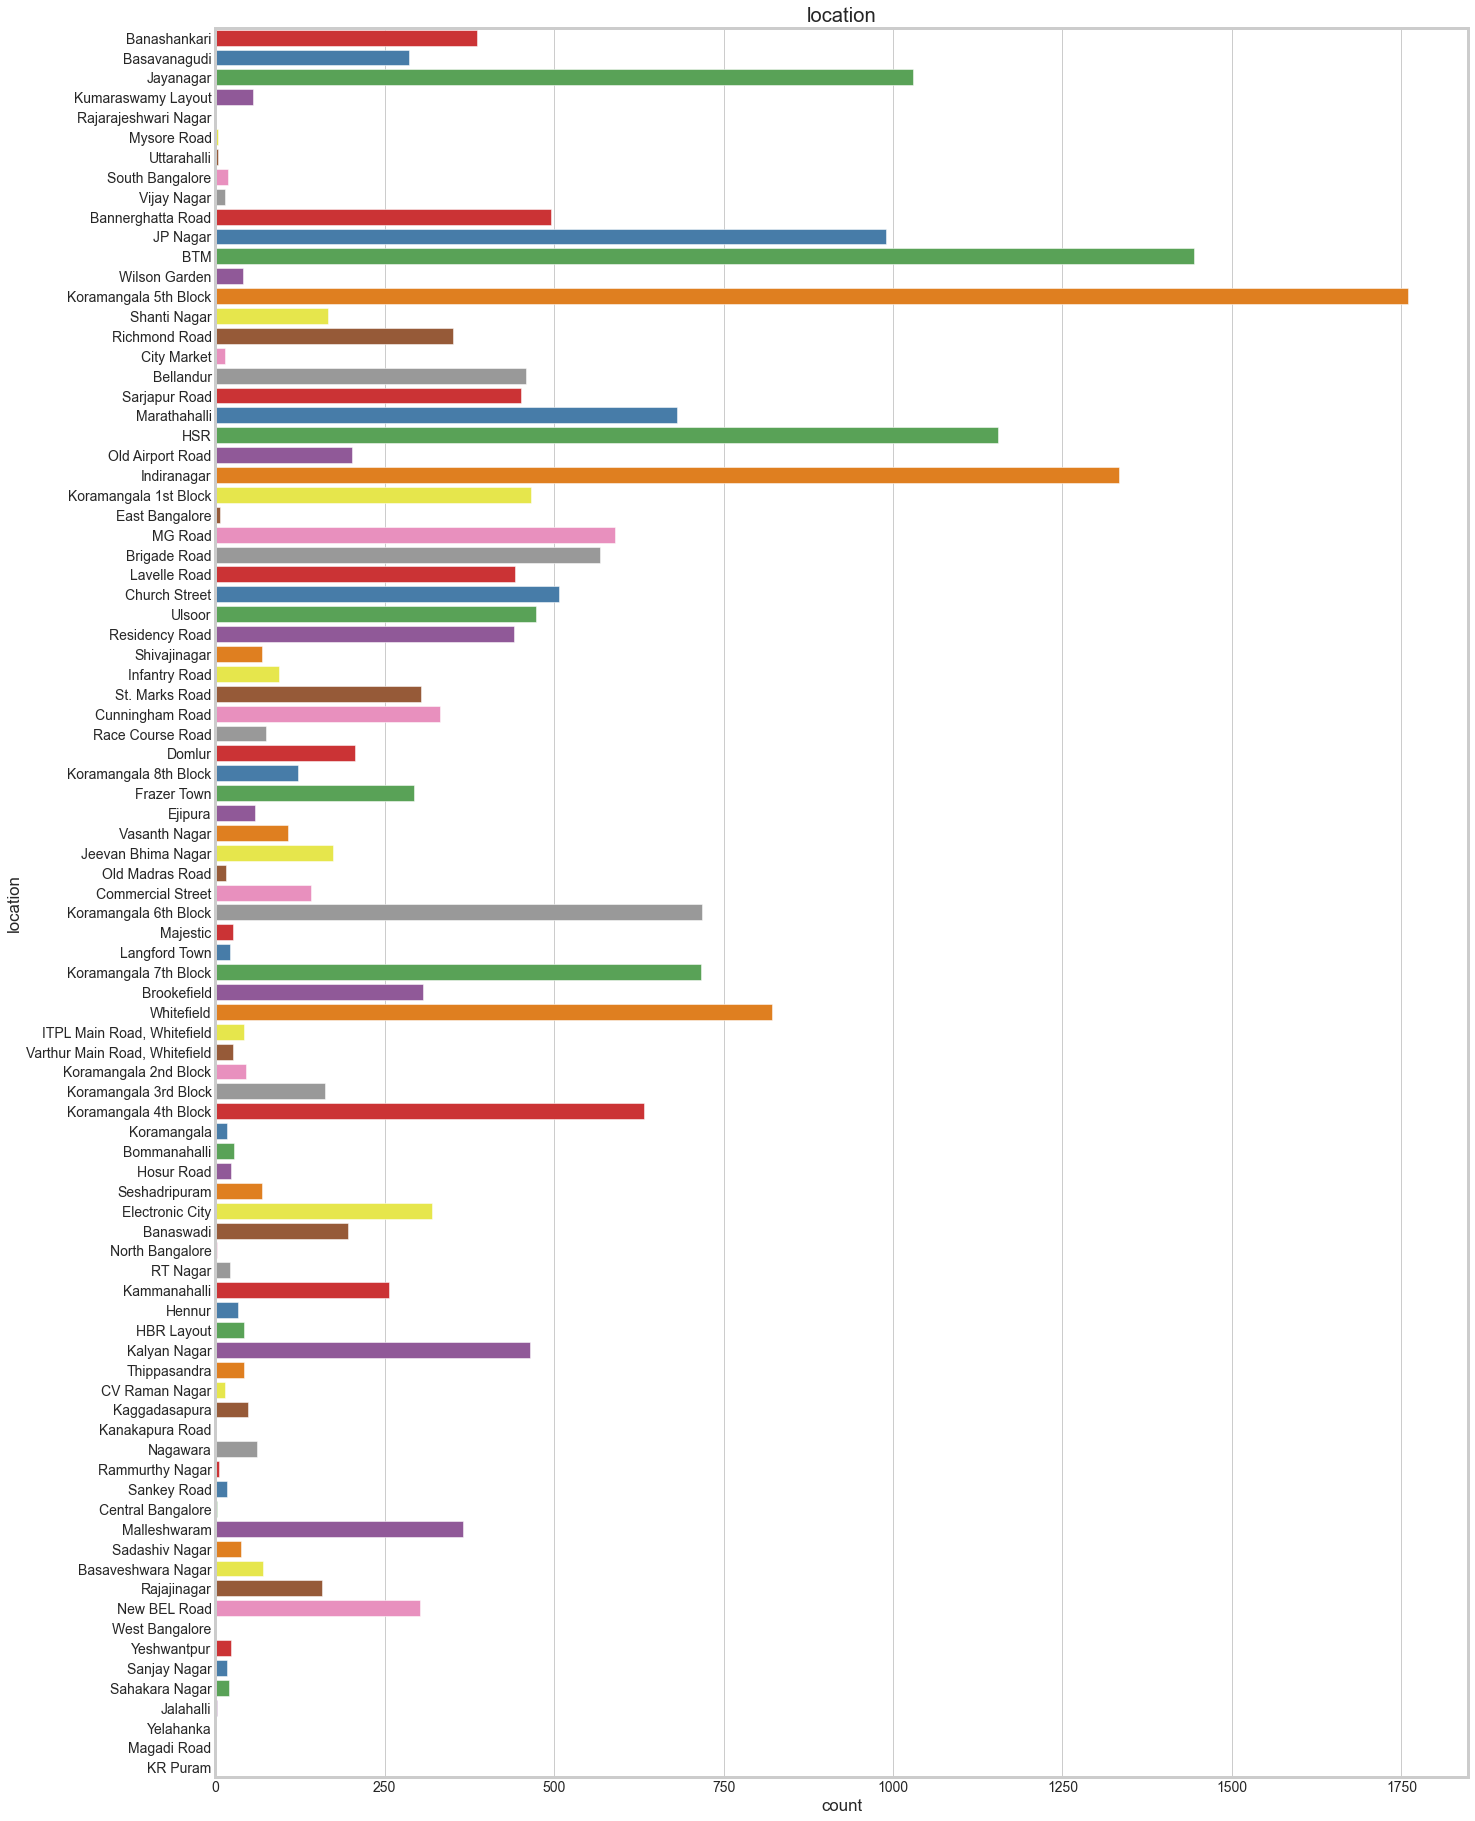

In [47]:
plt.figure(figsize = (20,30))
sns.countplot(y="location",data=df, palette = "Set1") 
plt.title('location')
plt.show()

### Which are the most popular cuisines of Banglore?

In [48]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

In [49]:
df.cuisines.value_counts()

North Indian                                                  1136
North Indian, Chinese                                          776
South Indian                                                   359
Cafe                                                           273
South Indian, North Indian, Chinese                            233
                                                              ... 
Andhra, Hyderabadi, Biryani                                      1
North Indian, South Indian, Chinese, Desserts, Street Food       1
Kerala, Biryani, Seafood, North Indian                           1
Cafe, Salad, Healthy Food, Mexican                               1
Italian, North Indian, South Indian, Chinese                     1
Name: cuisines, Length: 1677, dtype: int64

In [50]:
df.cuisines.nunique()

1677

C:\Users\XSKodaliYa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


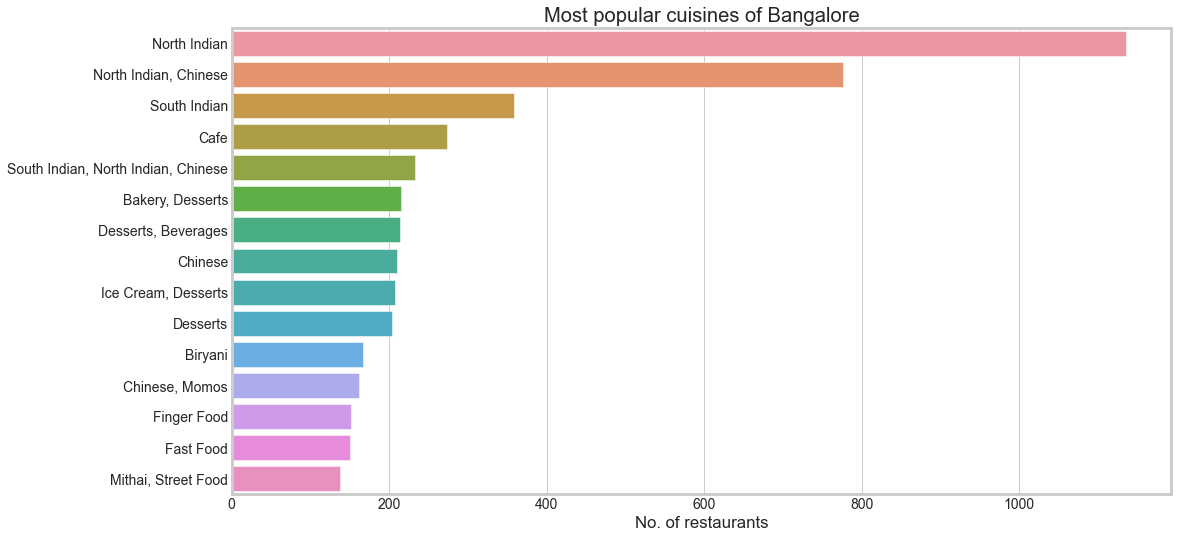

In [51]:
plt.figure(figsize=(15,8))
cuisines=df['cuisines'].value_counts()[:15]
sns.barplot(cuisines,cuisines.index)
plt.title('Most popular cuisines of Bangalore')
plt.xlabel('No. of restaurants')
plt.show()

### Distribution of the cost Vs ratings in parallel with online order

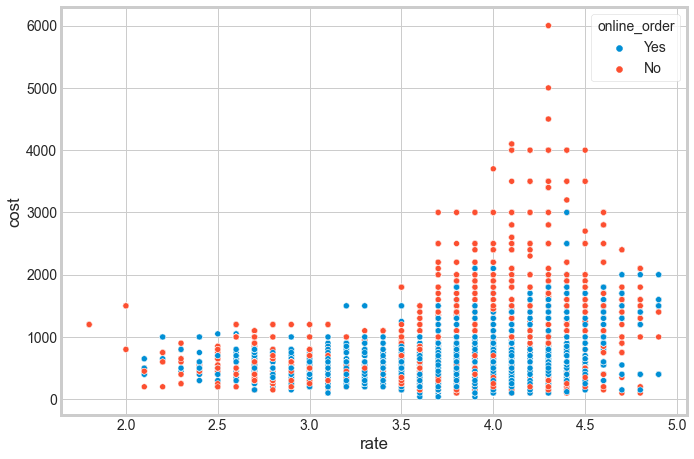

In [52]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df)
plt.show()

### Plotting the counts with the help of pie chart

In [53]:
df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [54]:
df['rate'].min()

1.8

In [55]:
df['rate'].max()

4.9

In [56]:
((df['rate']>=1) & (df['rate']<2)).sum()

5

In [57]:
((df['rate']>=2) & (df['rate']<3)).sum()

1169

In [58]:
((df['rate']>=3) & (df['rate']<4)).sum()

10118

In [59]:
(df['rate']>=4).sum()

11743

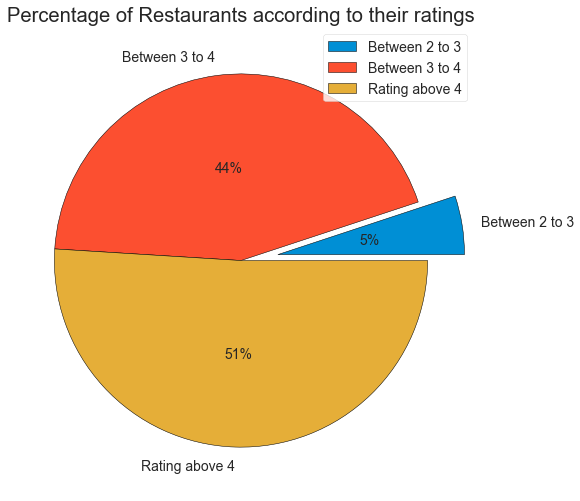

In [60]:
plt.figure(figsize=(10,8))
slices=[((df['rate']>=2) & (df['rate']<3)).sum(),
        ((df['rate']>=3) & (df['rate']<4)).sum(),
        (df['rate']>=4).sum()]

labels=['Between 2 to 3','Between 3 to 4','Rating above 4']

plt.pie(slices, labels=labels,
        wedgeprops={'edgecolor':'black'},
        autopct='%1.0f%%', 
        explode = [0.2,0,0],
        pctdistance=.5)

plt.title("Percentage of Restaurants according to their ratings")

plt.legend()
plt.show()

### Services Types

C:\Users\XSKodaliYa\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


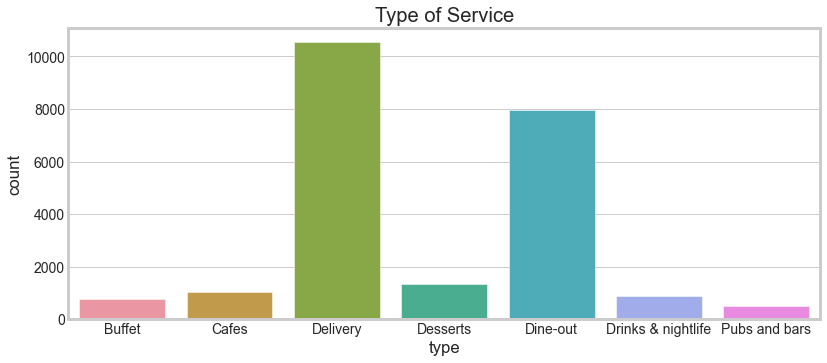

In [61]:
plt.figure(figsize=(12,5))
sns.countplot(df['type'])
plt.title('Type of Service')
plt.show()

#### Insights:
Here the two main service types are Delivery and Dine-out

In [62]:
df.dtypes

name             object
online_order     object
book_table       object
rate            float64
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

Encoding techniques:

    for ordinal data - factorize(),label encoding
    
    for nominal data - pd.get_dummies(), sklearn -> one hot encoding

#### Important Points:

#### 1.location and city are giving the same info...hence it makes no sense to keep the both 

#### 2.similarly in case of type and rest_type columns again they are giving the same info

#### 3.reviews_list and votes are also giving similar data and moreover we cannot convert huge data into numerical(that needs nlp)

#### 4.and same goes for the dish_liked, menu_item ... its having a lot of categorical data...which is very hard to encode

In [63]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


r : city,type,reviews_list

In [64]:
df.reviews_list.value_counts()

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [65]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Count Encoding

1.converting dataframe into dictionay

2.value counts

3.replacing unique values with their count in the dataset

In [66]:
df.name.value_counts().to_dict()

{'Onesta': 85,
 'Empire Restaurant': 67,
 'KFC': 59,
 "McDonald's": 57,
 'Pizza Hut': 56,
 "Domino's Pizza": 55,
 'Faasos': 54,
 "Smally's Resto Cafe": 54,
 'Corner House Ice Cream': 52,
 'Burger King': 51,
 'Polar Bear': 48,
 'Smoor': 47,
 "Mani's Dum Biryani": 47,
 'Pizza Stop': 46,
 'Subway': 45,
 'Chung Wah': 45,
 'Mainland China': 45,
 'Hammered': 44,
 'Lakeview Milkbar': 44,
 'Truffles': 43,
 'Beijing Bites': 43,
 'Leon Grill': 42,
 'Petoo': 42,
 'Oye Amritsar': 41,
 'Chai Point': 41,
 'Krispy Kreme': 41,
 'Toscano': 40,
 'Natural Ice Cream': 40,
 "Sherlock's Pub": 39,
 'Mudpipe Cafe': 39,
 'Barbeque Nation': 39,
 'California Burrito': 39,
 "Biggies Burger 'n' More": 39,
 'Kanti Sweets': 38,
 'Stoner': 38,
 'A2B - Adyar Ananda Bhavan': 38,
 'Hyderabad Biryaani House': 37,
 'Keventers': 35,
 'Nandhana Palace': 35,
 'XO Belgian Waffle': 34,
 'Haji Ali Juice Centre': 34,
 'The Belgian Waffle Co.': 34,
 'Just Shawarma': 34,
 'Cafe Thulp': 33,
 'Sreeraj Lassi Bar': 33,
 '99 Pancakes':

In [67]:
df_freq = df.name.value_counts().to_dict()

In [68]:
df.name = df.name.map(df_freq)

In [69]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [70]:
df_freq1 = df.location.value_counts().to_dict()

In [71]:
df.location = df.location.map(df_freq1)

In [72]:
df_freq2 = df.rest_type.value_counts().to_dict()

In [73]:
df.rest_type = df.rest_type.map(df_freq2)

In [74]:
df_freq3 = df.cuisines.value_counts().to_dict()

In [75]:
df.cuisines = df.cuisines.map(df_freq3)

In [76]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,Yes,Yes,4.1,775,387,7293,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",50,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,4,Yes,No,4.1,787,387,7293,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",8,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,11,Yes,No,3.8,918,387,159,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",11,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,2,No,No,3.7,88,387,5221,Masala Dosa,72,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,4,No,No,3.8,166,286,7293,"Panipuri, Gol Gappe",4,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Label Encoding

In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [78]:
def Encode(df):
    for column in df.columns[~df.columns.isin(['rate','cost','votes','name','location','rest_type','cuisines'])]:
        df[column] = le.fit_transform(df[column])
    return df

df_en = Encode(df.copy())

In [79]:
df_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,1,1,4.1,775,387,7293,3573,50,800.0,6331,5004,0,1
1,4,1,0,4.1,787,387,7293,2902,8,800.0,7612,5004,0,1
2,11,1,0,3.8,918,387,159,1385,11,800.0,2107,5004,0,1
3,2,0,0,3.7,88,387,5221,2705,72,300.0,5162,5004,0,1
4,4,0,0,3.8,166,286,7293,3382,4,600.0,9698,5004,0,1


### Feature Importance

In [80]:
df_en.corr()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
name,1.000000,0.138138,0.016703,0.108762,0.209757,0.029204,-0.103680,-0.056291,-0.070914,-0.022324,0.009496,-0.086660,-0.043866,0.008360
online_order,0.138138,1.000000,-0.140290,-0.039057,-0.080420,0.056731,0.169146,0.038505,0.024571,-0.295755,-0.052987,-0.341583,-0.236983,-0.051674
book_table,0.016703,-0.140290,1.000000,0.358226,0.326381,0.028130,-0.101034,-0.001851,-0.079115,0.604837,0.071764,0.086260,0.137851,0.034144
rate,0.108762,-0.039057,0.358226,1.000000,0.382126,0.097457,-0.224778,-0.002309,-0.150202,0.315255,0.296536,0.007205,0.043731,0.029738
votes,0.209757,-0.080420,0.326381,0.382126,1.000000,0.120905,-0.126552,-0.065962,-0.083371,0.310748,0.066614,0.030787,0.078882,0.026545
location,0.029204,0.056731,0.028130,0.097457,0.120905,1.000000,-0.012874,-0.007908,-0.031356,-0.072647,0.012015,-0.034325,-0.036727,-0.113772
rest_type,-0.103680,0.169146,-0.101034,-0.224778,-0.126552,-0.012874,1.000000,0.062521,0.134789,-0.176299,-0.051735,-0.001379,-0.092099,-0.035754
dish_liked,-0.056291,0.038505,-0.001851,-0.002309,-0.065962,-0.007908,0.062521,1.000000,0.015405,-0.012170,0.007709,-0.001812,-0.039428,-0.026768
cuisines,-0.070914,0.024571,-0.079115,-0.150202,-0.083371,-0.031356,0.134789,0.015405,1.000000,-0.118480,-0.017217,0.023765,-0.017880,-0.017254
cost,-0.022324,-0.295755,0.604837,0.315255,0.310748,-0.072647,-0.176299,-0.012170,-0.118480,1.000000,0.078784,0.129140,0.204007,0.071787


<AxesSubplot:>

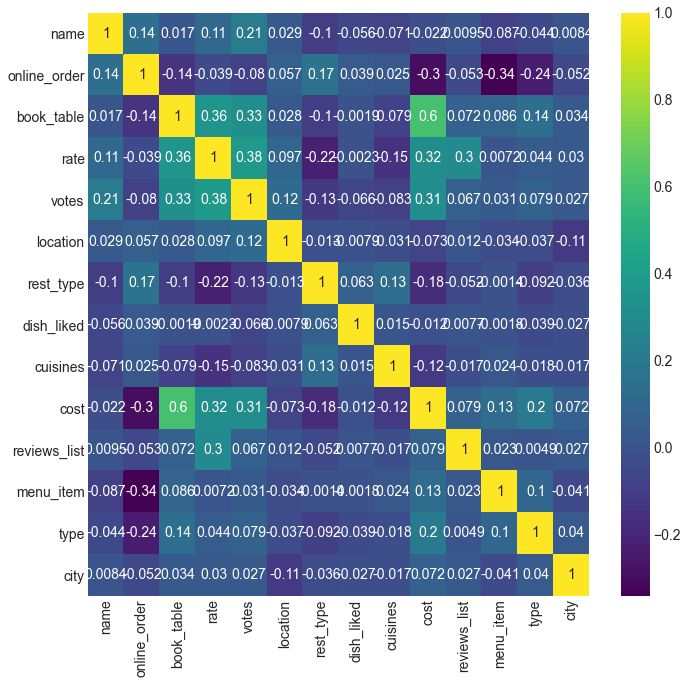

In [81]:
plt.figure(figsize = (10,10))
sns.heatmap(df_en.corr(), cmap='viridis', annot=True)

In [82]:
df_en.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,11,1,1,4.1,775,387,7293,3573,50,800.0,6331,5004,0,1
1,4,1,0,4.1,787,387,7293,2902,8,800.0,7612,5004,0,1
2,11,1,0,3.8,918,387,159,1385,11,800.0,2107,5004,0,1
3,2,0,0,3.7,88,387,5221,2705,72,300.0,5162,5004,0,1
4,4,0,0,3.8,166,286,7293,3382,4,600.0,9698,5004,0,1


In [83]:
my_data = df_en.iloc[:,[0,1,2,3,4,5,6,8,9,11]]
my_data.to_csv('zomato.csv')

In [84]:
x = df_en.iloc[:,[0,1,2,4,5,6,8,9,11]]

In [85]:
x.head()

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,11,1,1,775,387,7293,50,800.0,5004
1,4,1,0,787,387,7293,8,800.0,5004
2,11,1,0,918,387,159,11,800.0,5004
3,2,0,0,88,387,5221,72,300.0,5004
4,4,0,0,166,286,7293,4,600.0,5004


In [86]:
y = df_en['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23035, dtype: float64

In [87]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [88]:
model.feature_importances_

array([0.1322673 , 0.02695685, 0.12275862, 0.24956878, 0.12481577,
       0.08544898, 0.11885832, 0.12566918, 0.01365621])

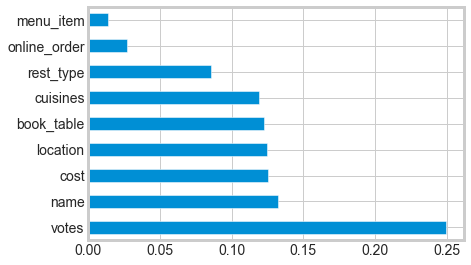

In [89]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.show()

### Splitting the dataset into train and test

In [90]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [91]:
x_train

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
23204,2,0,0,536,989,7293,59,950.0,5004
6223,10,0,1,91,443,128,10,1000.0,5004
45569,10,1,0,338,1334,302,125,800.0,1810
36645,11,1,0,85,717,5221,1136,400.0,5004
28270,11,1,0,206,1444,88,11,200.0,1645
...,...,...,...,...,...,...,...,...,...
21179,6,1,0,67,1030,5221,150,200.0,1449
16969,8,1,1,1884,1155,37,26,1500.0,5004
39719,38,1,0,78,22,7293,32,400.0,3216
16971,21,0,1,3573,1155,357,21,1000.0,5004


In [92]:
x_test

,name,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
47513,34,1,0,80,141,31,17,350.0,3227
14801,22,1,0,67,508,16,22,500.0,703
43838,5,0,1,888,443,311,9,3000.0,5004
48464,10,0,0,96,508,5221,150,500.0,5004
32266,6,1,0,391,466,341,82,500.0,5004
...,...,...,...,...,...,...,...,...,...
12898,14,1,0,55,304,5221,34,400.0,5004
36770,7,0,1,817,718,2321,7,800.0,5004
44907,3,1,0,74,1334,667,776,300.0,1115
323,8,1,0,91,1030,2321,13,300.0,5004


### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred = lr.predict(x_test)

In [95]:
from sklearn.metrics import r2_score
r2_scoreLR = r2_score(y_test,y_pred)

In [96]:
r2_scoreLR

0.2465360257024004

### Support Vector Regression

In [97]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [98]:
y_pred = svr.predict(x_test)

In [99]:
from sklearn.metrics import r2_score
r2_scoreSVR = r2_score(y_test,y_pred)

In [100]:
r2_scoreSVR

0.27611014500344133

### Random Forest Regression

In [101]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=650,random_state=245, min_samples_leaf=.0001)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

In [102]:
r2_scoreRF = r2_score(y_test, y_pred)

In [103]:
r2_scoreRF

0.8950231331772706

### Extra Tree Regression

In [104]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor(n_estimators = 120)
et.fit(x_train,y_train)
y_pred = et.predict(x_test)

In [105]:
r2_scoreET = r2_score(y_test, y_pred)

In [106]:
r2_scoreET

0.9420422177030778

### Serialization

In [107]:
import pickle
pickle.dump(et,open('model.pkl', 'wb'))
model = pickle.load(open('model.pkl', 'rb'))

### Deployment

MNC Servers --> application, data, security, os

IAAS - Infrastructure as a service -->AWS, AZURE, GOOGLE CLOUD --> 

PAAS - Platform as a service --> Heroku, Flask